# CAMB: **C**ode for **A**nisotropies in the **M**icrowave **B**ackground

- Código ampliamente utilizado en cosmología desarrollado por [Antony Lewis](https://inspirehep.net/authors/1000394) y [Anthony Challinor](https://inspirehep.net/authors/1031077)
- Resuelve las ecuaciones de Boltzmann y estima observables dado un set de parámetros cosmológicos
- Cuenta con una versión en [Python](https://camb.readthedocs.io/en/latest/) y en [Fortran](https://camb.info/readme.html)


In [1]:
"""
Importemos nuestras librerías

En caso de no haber instalado CAMB, podemos descomentar una de estas líneas:
"""
# !pip install camb
# !conda install -c conda-forge camb

import camb
from camb import model

import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.2


## Configurar un set de parámetros en CAMB

Consideremos las estimaciones de [Planck](https://arxiv.org/abs/1807.06209)

| | |
| - | - |
| $H_0 = (67.4 ± 0.5) km/s/Mpc $ | Hubble constant |
| $\Omega_m = 0.315 ± 0.0071$ | matter density parameter |
| $\Omega_c h^2: 0.120 ± 0.0011$ | dark matter density |
| $\Omega_b h^2 = 0.0224 ± 0.00011$ | baryon density |
| $ns = 0.965 ± 0.0041$ | scalar spectral index | 
| $\tau = 0.054 ± 0.0071$ | optical depth | 

In [2]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

Para configurar un set de parámetros veremos dos formas:
`camb.CAMBparams()` y `camb.set_params()`

### `camb.CAMBparams()`

In [3]:
help(camb.CAMBparams)

Help on class CAMBparams in module camb.model:

class CAMBparams(camb.baseconfig.F2003Class)
 |  CAMBparams(**kwargs)
 |  
 |  Object storing the parameters for a CAMB calculation, including cosmological parameters and
 |  settings for what to calculate. When a new object is instantiated, default parameters are set automatically.
 |  
 |  To add a new parameter, add it to the CAMBparams type in model.f90, then  edit the _fields_ list in the CAMBparams
 |  class in model.py to add the new parameter in the corresponding location of the member list. After rebuilding the
 |  python version you can then access the parameter by using params.new_parameter_name where params is a CAMBparams
 |  instance. You could also modify the wrapper functions to set the field value less directly.
 |  
 |  You can view the set of underlying parameters used by the Fortran code by printing the CAMBparams instance.
 |  In python, to set cosmology parameters it is usually best to use :meth:`set_cosmology` and
 

In [4]:
pars = camb.CAMBparams()  # objeto en donde guardaremos los parámetros

# configuremos los parámetros
# los parámetros no especificados mantiene los valores por default
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

# revisar el output para ver los distintos parámetros que se pueden configurar

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [5]:
"""
si quiero cambiar un parámetro dentro de una "categoría", debo especificar el 
nombre de la categoría y luego establecer el parámetro deseado

A modo de ejemplo, si quiero cambiar el parámetro de la ecuación de estado de la
energía oscura, w:
"""

pars.set_dark_energy(w=-1);  # ; para no imprimir el output

In [6]:
# Dado el set de parámetros, pedimos a CAMB obtener los resultados
results = camb.get_results(pars)

### `camb.set_params()`
función útil que permite hacer cambios de forma más rápida

Permite cambiar parámetros que estén dentro de categorías sin tener que acceder
a ellas

In [7]:
pars2 = camb.set_params(H0=67.4, w=-0.1, cs2=0.1)
results2 = camb.get_results(pars2)

### 
Una vez pedido `get_results`, podemos pedir a CAMB observables

## Evolución de las densidades $\Omega$

In [8]:
help(results.get_Omega)

Help on method get_Omega in module camb.results:

get_Omega(var, z=0) method of camb.results.CAMBdata instance
    Get density relative to critical density of variables var
    
    :param var: one of 'K', 'cdm', 'baryon', 'photon', 'neutrino' (massless), 'nu' (massive neutrinos), 'de'
    :param z: redshift
    :return:  :math:`\Omega_i(a)`



In [9]:
def a_to_z(a):
    return 1/a - 1

a_s = np.linspace(1, 1e-4, 10_000)
zs = a_to_z(a_s)

In [10]:
# dark energy
Omega_de = results.get_Omega('de', z=zs)

# matter
Omega_cdm = results.get_Omega('cdm', z=zs)
Omega_b = results.get_Omega('baryon', z=zs)
Omega_n = results.get_Omega('neutrino', z=zs)
Omega_mn = results.get_Omega('nu', z=zs)

Omega_m = Omega_cdm + Omega_b + Omega_n + Omega_mn

# radiation
Omega_r = results.get_Omega('photon', z=zs)

# curvature
Omega_K = results.get_Omega('K', z=zs)

# total
Omega_tot = Omega_de + Omega_m + Omega_r + Omega_K

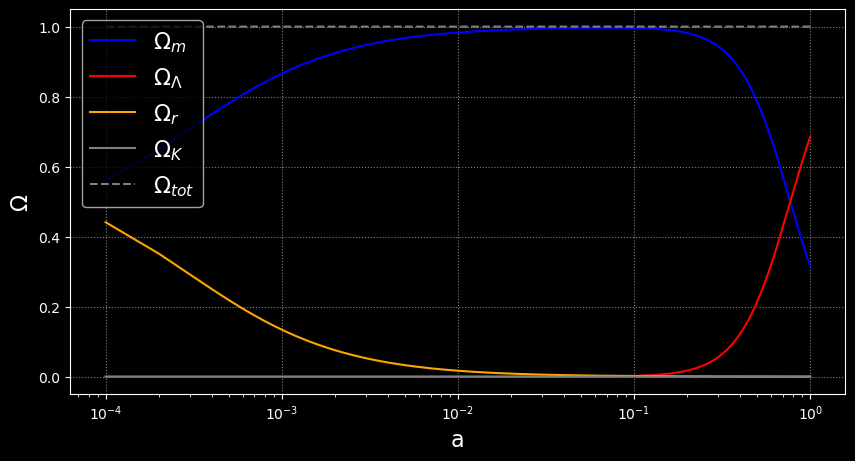

In [11]:
plt.figure(figsize=(10, 5))
plt.semilogx(a_s, Omega_m, color='b', label=r'$\Omega_m$')
plt.semilogx(a_s, Omega_de, color='r', label=r'$\Omega_{\Lambda}$')
plt.semilogx(a_s, Omega_r, color='orange', label=r'$\Omega_r$')
plt.semilogx(a_s, Omega_K, color='grey', label=r'$\Omega_K$')
plt.semilogx(a_s, Omega_tot, color='grey', ls='--', label=r'$\Omega_{tot}$')

plt.xlabel('a', fontsize=16)
plt.ylabel(r'$\Omega$', fontsize=16)
plt.grid(alpha=0.5, ls=':')
plt.legend(fontsize=16, loc='upper left')
plt.show()

In [12]:
print(
f"""
Valores actuales

\u03A9m: {Omega_m[0]:0.2e}
\u03A9de: {Omega_de[0]:0.2e}
\u03A9r: {Omega_r[0]:0.2e}
\u03A9K: {Omega_K[0]:0.2e}
\u03A9tot: {Omega_tot[0]:0.2e}
"""
)


Valores actuales

Ωm: 3.15e-01
Ωde: 6.85e-01
Ωr: 5.44e-05
ΩK: 0.00e+00
Ωtot: 1.00e+00



## Distancias

In [13]:
help(results.angular_diameter_distance)

Help on method angular_diameter_distance in module camb.results:

angular_diameter_distance(z) method of camb.results.CAMBdata instance
    Get (non-comoving) angular diameter distance to redshift z.
    
    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer
    functions or power spectra.
    
    :param z: redshift or array of redshifts
    :return: angular diameter distances, matching rank of z



In [14]:
help(results.luminosity_distance)

Help on method luminosity_distance in module camb.results:

luminosity_distance(z) method of camb.results.CAMBdata instance
    Get luminosity distance from to redshift z.
    
    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer functions or
    power spectra.
    
    :param z: redshift or array of redshifts
    :return: luminosity distance (matches rank of z)



In [15]:
zs = np.linspace(0, 10, 1_000)

D_ang = results.angular_diameter_distance(zs)
D_lum = results.luminosity_distance(zs)


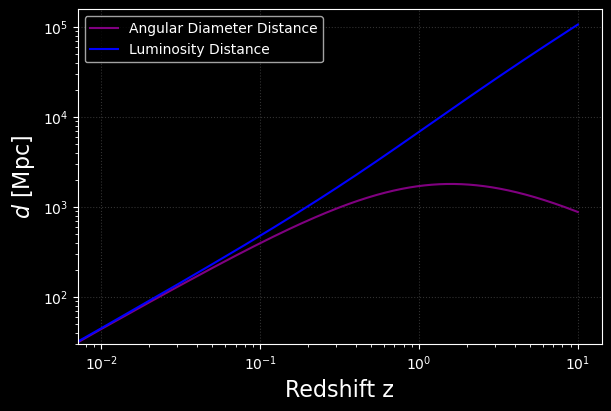

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True)
ax.loglog(zs, D_ang, color='purple', label='Angular Diameter Distance')
ax.loglog(zs, D_lum, color='b', label='Luminosity Distance')

ax.grid(alpha=0.2, ls=':')

ax.legend()
ax.set_xlabel(r'Redshift z', fontsize=16)
ax.set_ylabel(r'$d$ [Mpc]', fontsize=16)
plt.show()

### **Propuesto:**


Comparar con la solución analítica

$$ D_a(z) = \frac{f_K(\chi)}{1+z}, \quad D_L(z) = (1+z)f_K(\chi)$$ 

Donde:
\begin{align}
    f_K(\chi) =
    \begin{cases}
        \frac{c}{H_0\sqrt{\Omega_{K,0}}} \sinh{\left(\sqrt{\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}>0 \\
        \frac{c}{H_0}\int_0^z \frac{dx}{E(x)} & \Omega_{k,0}=0\\
        \frac{c}{H_0\sqrt{-\Omega_{K,0}}} \sin{\left(\sqrt{-\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}<0\\
    \end{cases}
\end{align}


\begin{align}
    E(z) = H(z) / H_0
\end{align}


\begin{align}
    H^2(z) = H_0^2 \left[\Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}(1+z)^{3(1+w)} + \Omega_{K,0}(1+z)^2\right]
\end{align}

In [17]:
import scipy.integrate as integrate
from astropy.cosmology import Planck18 as cosmo
import astropy.constants as const
import astropy.units as u

H_0 = (cosmo.H0).value
c = ((const.c).to(u.km/u.s)).value

def H(z, omega_m, omega_DE, omega_r=0, w=-1):
    """
    Función que calcula el parámetro de Hubble
    en unidades km/s/Mpc

    inputs
    ======
    - z: redshift
    - omega_m: parámetro de densidad de materia
    - omega_DE: parámetro de densidad de energía oscura
    - omega_r: parámetro de densidad de radiación
      (valor por default: 0)
    - w: parámetro de ec. estado energía oscura
      (valor por default: -1)  
    """

    omega_k = 1 - omega_m - omega_DE - omega_r

    radiation = omega_r * (1+z)**4
    matter = omega_m * (1+z)**3
    dark_energy = omega_DE * (1+z)**(3 * (1+w))
    curvature = omega_k * (1+z)**2

    H_square = H_0 **2 * (radiation + matter + 
                          dark_energy + curvature)
    
    if H_square <= 0:
        return np.NaN
        
    return np.sqrt(H_square) 


def f_k(z, omega_m, omega_DE, omega_r=0, w=-1):
    """
    Función que calcula la función f_k(Chi)
    entrega distancias en Mpc

    inputs
    ======
    - z: redshift
    - omega_m: parámetro de densidad de materia
    - omega_DE: parámetro de densidad de energía oscura
    - omega_r: parámetro de densidad de radiación
      (valor por default: 0)
    - w: parámetro de ec. estado energía oscura
      (valor por default: -1)  
    """

    def E_inv(x):
        return H_0 / H(x, omega_m, omega_DE, omega_r, w=w)

    d_com = c/H_0 * integrate.quad(E_inv, 0, z, full_output=1)[0]  # comoving distance

    omega_k = 1 - omega_m - omega_DE - omega_r

    if omega_k > 0:
        arg = np.sqrt(omega_k) * d_com * H0 / c
        fk = np.sinh(arg) / np.sqrt(omega_k) * H0 / c
    
    elif omega_k < 0:
        arg = np.sqrt(np.abs(omega_k)) * d_com * H0 / c
        fk = np.sin(arg) / np.sqrt(np.abs(omega_k)) * H0 / c

    elif omega_k == 0:
        return d_com

    return fk


def D_A(z, omega_m, omega_DE, omega_r=0, w=-1):
    """
    Función que calcula la distancia angular
    entrega distancias en Mpc

    inputs
    ======
    - z: redshift
    - omega_m: parámetro de densidad de materia
    - omega_DE: parámetro de densidad de energía oscura
    - omega_r: parámetro de densidad de radiación
      (valor por default: 0)
    - w: parámetro de ec. estado energía oscura
      (valor por default: -1)  
    """

    return f_k(z, omega_m, omega_DE, omega_r, w=w) / (1+z)


def D_L(z, omega_m, omega_DE, omega_r=0, w=-1):
    """
    Función que calcula la distancia de luminosidad
    entrega distancias en Mpc

    inputs
    ======
    - z: redshift
    - omega_m: parámetro de densidad de materia
    - omega_DE: parámetro de densidad de energía oscura
    - omega_r: parámetro de densidad de radiación
      (valor por default: 0)
    - w: parámetro de ec. estado energía oscura
      (valor por default: -1)  
    """

    return (1+z) * f_k(z, omega_m, omega_DE, omega_r, w=w)

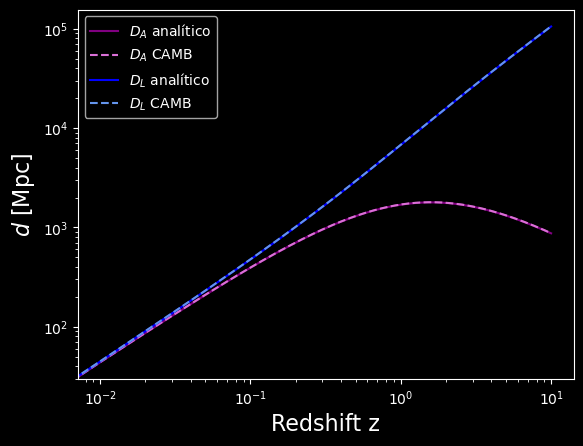

In [18]:
omegas = [Omega_m[0], Omega_de[0], Omega_r[0], pars.DarkEnergy.w]

D_ang_analytic = [D_A(z, *omegas) for z in zs]
D_lum_analytic = [D_L(z, *omegas) for z in zs]

plt.loglog(zs, D_ang_analytic, color='purple', label=r'$D_A$ analítico')
plt.loglog(zs, D_ang, color='orchid', ls='--', label=r'$D_A$ CAMB')
plt.loglog(zs, D_lum_analytic, color='b', label=r'$D_L$ analítico')
plt.loglog(zs, D_lum, color='cornflowerblue', ls='--', label=r'$D_L$ CAMB')

plt.xlabel(r'Redshift z', fontsize=16)
plt.ylabel(r'$d$ [Mpc]', fontsize=16)

plt.legend()
plt.show()

## Evolución de los Contrastes de Densidad $\delta$

<img src="https://i.ibb.co/28cCD6B/image.png" width=500px>

In [19]:
help(results.get_redshift_evolution)

Help on method get_redshift_evolution in module camb.results:

get_redshift_evolution(q, z, vars=['k/h', 'delta_cdm', 'delta_baryon', 'delta_photon', 'delta_neutrino', 'delta_nu', 'delta_tot', 'delta_nonu', 'delta_tot_de', 'Weyl', 'v_newtonian_cdm', 'v_newtonian_baryon', 'v_baryon_cdm', 'a', 'etak', 'H', 'growth', 'v_photon', 'pi_photon', 'E_2', 'v_neutrino', 'T_source', 'E_source', 'lens_potential_source'], lAccuracyBoost=4) method of camb.results.CAMBdata instance
    Get the mode evolution as a function of redshift for some k values.
    
    :param q: wavenumber values to calculate (or array of k values)
    :param z: array of redshifts to output
    :param vars: list of variable names or camb.symbolic sympy expressions to output
    :param lAccuracyBoost: boost factor for ell accuracy (e.g. to get nice smooth curves for plotting)
    :return: nd array, A_{qti}, size(q) x size(times) x len(vars), or 2d array if q is scalar



In [19]:
help(results.get_time_evolution)

Help on method get_time_evolution in module camb.results:

get_time_evolution(q, eta, vars=['k/h', 'delta_cdm', 'delta_baryon', 'delta_photon', 'delta_neutrino', 'delta_nu', 'delta_tot', 'delta_nonu', 'delta_tot_de', 'Weyl', 'v_newtonian_cdm', 'v_newtonian_baryon', 'v_baryon_cdm', 'a', 'etak', 'H', 'growth', 'v_photon', 'pi_photon', 'E_2', 'v_neutrino', 'T_source', 'E_source', 'lens_potential_source'], lAccuracyBoost=4, frame='CDM') method of camb.results.CAMBdata instance
    Get the mode evolution as a function of conformal time for some k values.
    
    Note that gravitational potentials (e.g. Weyl) are not integrated in the code and are
    calculated as derived parameters; they may be numerically unstable far outside the horizon.
    (use the series expansion result if needed far outside the horizon)
    
    :param q: wavenumber values to calculate (or array of k values)
    :param eta: array of requested conformal times to output
    :param vars: list of variable names or symp

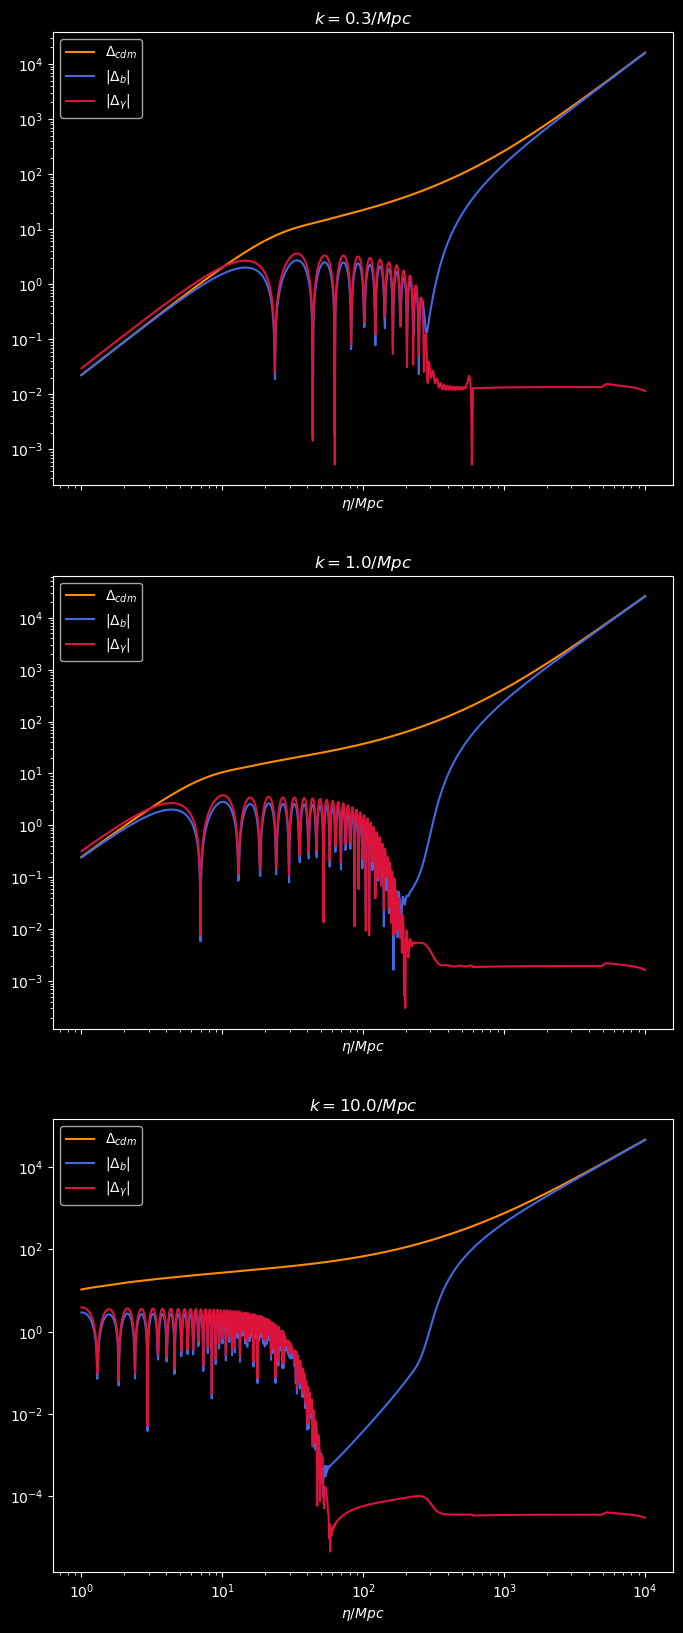

In [21]:
eta = np.logspace(0, 4, 1_000)

ks = np.array([0.3, 1, 10])
evolution = results.get_time_evolution(ks, eta, ['delta_cdm', 'delta_baryon',
                                                 'delta_photon'])

fig, axs= plt.subplots(nrows=len(ks), figsize=(8,20), sharex=True)

for i, ax in enumerate(axs):
    ax.loglog(eta, evolution[i, :, 0], color='darkorange', label=r'$\Delta_{cdm}$')
    ax.loglog(eta, np.abs(evolution[i, :, 1]), color='royalblue', label=r'|$\Delta_{b}$|')
    ax.loglog(eta, np.abs(evolution[i, :, 2]), color='crimson', label=r'$|\Delta_{\gamma}|$')

    ax.legend()
    ax.set_title(f'$k = {ks[i]}/Mpc$')
    ax.set_xlabel(r'$\eta/Mpc$')

plt.show()

## Matter Power Spectrum

In [ ]:
help(results.get_linear_matter_power_spectrum)

Help on method get_linear_matter_power_spectrum in module camb.results:

get_linear_matter_power_spectrum(var1=None, var2=None, hubble_units=True, k_hunit=True, have_power_spectra=True, params=None, nonlinear=False) method of camb.results.CAMBdata instance
    Calculates :math:`P_{xy}(k)`, where x, y are one of model.Transfer_cdm, model.Transfer_xx etc.
    The output k values are not regularly spaced, and not interpolated. They are either k or k/h depending on the
    value of k_hunit (default True gives k/h).
    
    For a description of outputs for different var1, var2 see :ref:`transfer-variables`.
    
    :param var1: variable i (index, or name of variable; default delta_tot)
    :param var2: variable j (index, or name of variable; default delta_tot)
    :param hubble_units: if true, output power spectrum in (Mpc/h) units, otherwise Mpc
    :param k_hunit: if true, matter power is a function of k/h, if false, just k (both :math:`{\rm Mpc}^{-1}` units)
    :param have_power_spect

In [ ]:
help(results.get_matter_power_spectrum)

Help on method get_matter_power_spectrum in module camb.results:

get_matter_power_spectrum(minkh=0.0001, maxkh=1.0, npoints=100, var1=None, var2=None, have_power_spectra=False, params=None) method of camb.results.CAMBdata instance
    Calculates :math:`P_{xy}(k/h)`, where x, y are one of Transfer_cdm, Transfer_xx etc.
    The output k values are regularly log spaced and interpolated. If NonLinear is set, the result is non-linear.
    
    For a description of outputs for different var1, var2 see :ref:`transfer-variables`.
    
    :param minkh: minimum value of k/h for output grid (very low values < 1e-4 may not be calculated)
    :param maxkh: maximum value of k/h (check consistent with input params.Transfer.kmax)
    :param npoints: number of points equally spaced in log k
    :param var1: variable i (index, or name of variable; default delta_tot)
    :param var2: variable j (index, or name of variable; default delta_tot)
    :param have_power_spectra: set to True if already compute

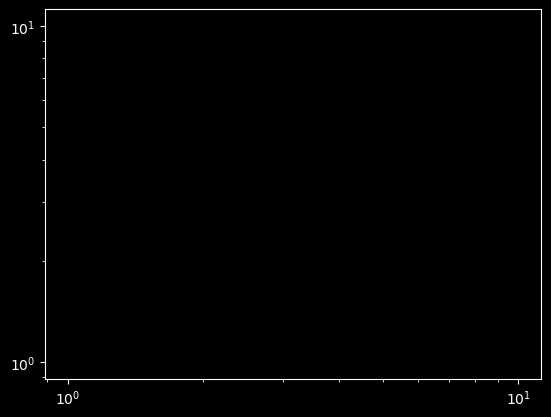

In [ ]:
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True, 
                                                     k_hunit=True)

plt.figure()
plt.loglog(kh, PK[0, :])

- no aparece nada en la figura anterior porque no le hemos dado a CAMB información sobre el Matter Power Spectrum

In [ ]:
z_max = 250
redshifts = np.arange(0, z_max, int(z_max / 5))

# set Matter Power Spectrum
pars.set_matter_power(redshifts=redshifts, kmax=1)
pars2.set_matter_power(redshifts=redshifts, kmax=1)

results = camb.get_results(pars)
results2 = camb.get_results(pars2)

# get Matter Power Spectrum
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True,
                                                     k_hunit=True)
kh2, z2, PK2 = results2.get_linear_matter_power_spectrum(hubble_units=True,
                                                         k_hunit=True)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


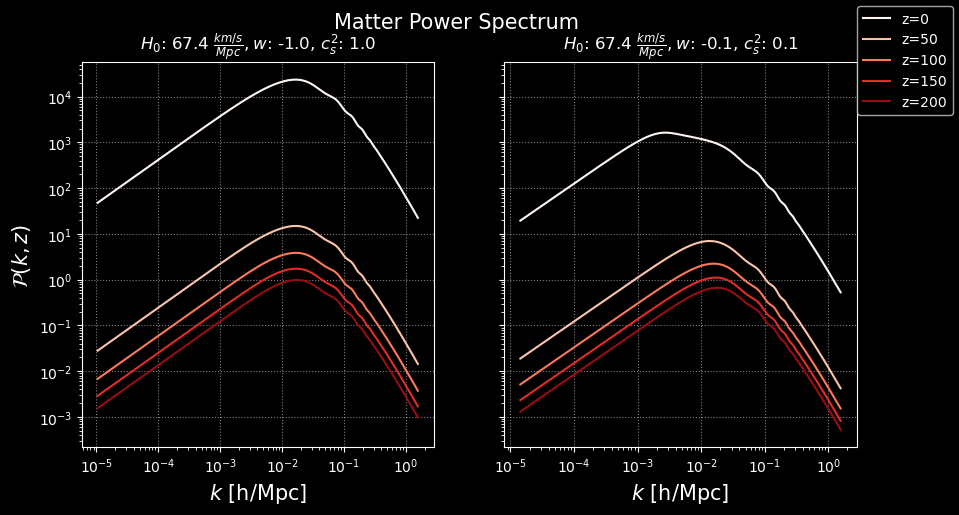

In [ ]:
colors = plt.cm.Reds(np.linspace(0, 0.9, len(redshifts)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
for iz, redshift in enumerate(redshifts):
    ax[0].loglog(kh, PK[iz, :], color=colors[iz], label=f"z={redshift}")
    ax[1].loglog(kh2, PK2[iz, :], color=colors[iz])


fig.legend(loc='upper right')
ax[0].set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax[0].set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax[0].set_title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f"$w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")
ax[0].grid(alpha=0.5, ls=':')

ax[1].set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax[1].set_title(f"$H_0$: {pars2.H0} $\\frac{{km/s}}{{Mpc}}, $" +
                f"$w$: {pars2.DarkEnergy.w}, $c_s^2$: {pars2.DarkEnergy.cs2}")
ax[1].grid(alpha=0.5, ls=':')
fig.suptitle("Matter Power Spectrum", fontsize=15)

plt.show()

- notar que, a medida que $z$ aumenta, el Matter PS disminuye

### Términos no lineales en el MPS

In [ ]:
redshifts = [10, 5, 1, 0]

# set non-linear Matter Power Spectrum
pars.NonLinear = model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh_nl, z_nl, PK_nl = results.get_matter_power_spectrum(minkh=1e-4)


# o de forma alternativa, de la celda anterior
# kh_nl, z_nl, PK_nl = results.get_linear_matter_power_spectrum(hubble_units=True,
#                                                               k_hunit=True
#                                                               nonlinear=True)


# set linear Matter Power Spectrum
pars.NonLinear = model.NonLinear_none
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh, z, PK = results.get_matter_power_spectrum(minkh=1e-4)

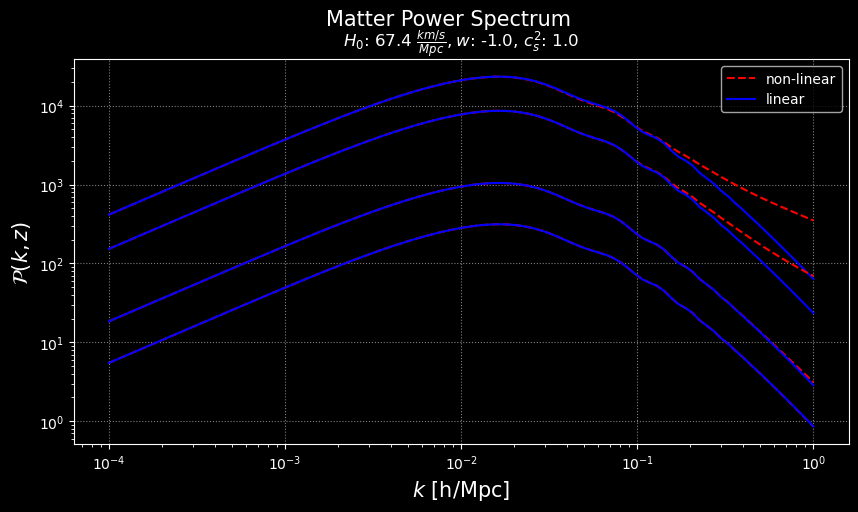

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh_nl, PK_nl[iz, :], color='r', ls='--')
    ax.loglog(kh, PK[iz, :], color='b')


ax.legend(['non-linear', 'linear'], loc='upper right')
ax.set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax.set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax.set_title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f"$w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")
ax.grid(alpha=0.5, ls=':')
fig.suptitle("Matter Power Spectrum", fontsize=15)

plt.show()

### Matter PS utilizando función de Transferencia

$$ \mathcal{P}(k) \propto T(k)^2 P_{\zeta}(k)$$

<image src="https://i.ibb.co/JsDTkLT/image.png" width=500px>

<image src="https://i.ibb.co/rwdKrpY/image.png" width=500px>

In [ ]:
pars.set_matter_power(redshifts=[0], kmax=1)
results = camb.get_results(pars)

transf = results.get_matter_transfer_data()

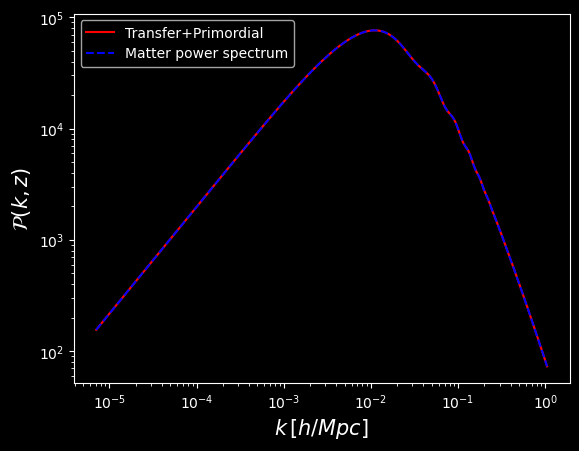

In [ ]:
# Get transfer function
kh = transf.transfer_data[0, :, 0]
k = kh * results.Params.h  # transfer data gives the results in units of h/MPC, so we transform

transfer = transf.transfer_data[model.Transfer_tot-1,:,0]

# Get primordial power spectrum
primordial_PK = results.Params.scalar_power(k)

# All together
matter_power = primordial_PK * transfer**2 * k**4 / (k**3/(2*np.pi**2))

kh2, zs, PK = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)

plt.loglog(k, matter_power, c='r', label='Transfer+Primordial')
plt.loglog(kh2, PK[0, :], c='b', ls='--', label='Matter power spectrum')
plt.legend()
plt.ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
plt.xlabel(r'$k\, [h/Mpc]$', fontsize=15)

plt.show()

## Angular Power Spectrum

In [ ]:
help(results.get_cmb_power_spectra)

Help on method get_cmb_power_spectra in module camb.results:

get_cmb_power_spectra(params=None, lmax=None, spectra=('total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'), CMB_unit=None, raw_cl=False) method of camb.results.CAMBdata instance
    Get CMB power spectra, as requested by the 'spectra' argument. All power spectra are
    :math:`\ell(\ell+1)C_\ell/2\pi` self-owned numpy arrays (0..lmax, 0..3), where 0..3 index
    are TT, EE, BB, TE, unless raw_cl is True in which case return just :math:`C_\ell`.
    For the lens_potential the power spectrum returned is that of the deflection.
    
    Note that even if lmax is None, all spectra a returned to the same lmax, appropriate
    for lensed spectra. Use the individual functions instead if you want to the full unlensed
    and lensing potential power spectra to the higher lmax actually computed.
    
    :param params: optional :class:`~.model.CAMBparams` instance with parameters to use. If None,

In [ ]:
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


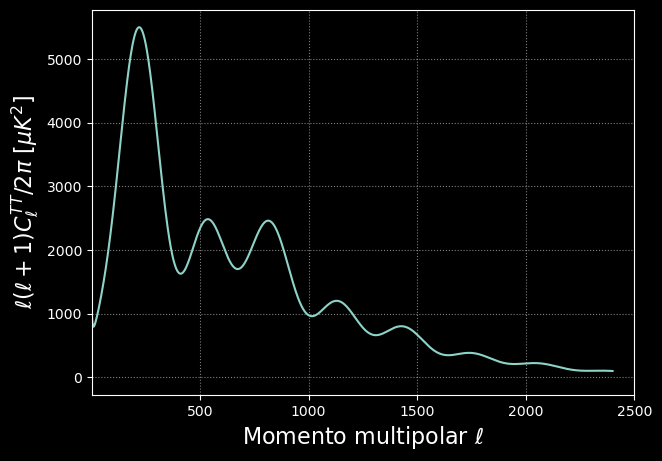

In [ ]:
unlensedCL=powers['unlensed_scalar']

ells = np.arange(unlensedCL[:, 0].shape[0])

plt.figure(figsize=(7, 5))
plt.plot(ells, unlensedCL[:, 0])  # 0: TT, 1: EE, 2: BB, 3: TE
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()

<img src="https://i.ibb.co/cTSL91J/image.png" width="750px" alt="Image">

## Notación simbólica
guía: [Notebook](https://camb.readthedocs.io/en/latest/ScalEqs.html)

'background_eqs'

'density_eqs'

'delta_eqs'

'vel_eqs'

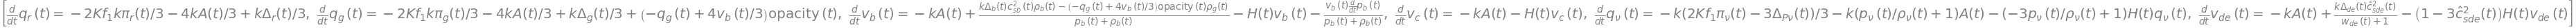

In [ ]:
from camb.symbolic import *
sympy.init_printing()

display('background_eqs', background_eqs)

#Fluid components
display('density_eqs',density_eqs)
display('delta_eqs', delta_eqs)
display('vel_eqs',vel_eqs)

## Referencias
- [Github CAMB](https://github.com/cmbant/CAMB)
- https://camb.info
- [CAMB demo](https://hub.ovh2.mybinder.org/user/cmbant-camb-5fgbcrkq/notebooks/docs/CAMBdemo.ipynb)
- http://icg.port.ac.uk/~jschewts/cantata/CAMB/CAMB_lecture.pdf
- [Tutorial Dani Grandón](https://www.u-cursos.cl/ingenieria/2020/2/FI7015/1/material_docente/bajar?id=3386200&bajar=1)